# Day 11 3D
The magnificent third dimension! Visualize something in 3D
### For this case, I decided to visualize the elevations for México. Which are from less than 5000 at sea level to more than 3000 in Height above sea level (in meters) 

In [1]:
import pygmt
import geopandas as gpd
import os
import matplotlib.pyplot as plt

Recorte conforme a un archivo vectorial (shp) de la extensión

In [26]:
mexico = gpd.read_file("dest20gw/dest20gw.shp")
minx, miny, maxx, maxy = mexico.geometry.total_bounds.round()

In [27]:
# Load sample earth relief data
grid = pygmt.datasets.load_earth_relief(resolution="10m", region=[minx, maxx, miny, maxy])
# Set all grid points < 0 m to a value of -1000 m.
gridt = pygmt.grdclip(grid, below=[0, -10])
gridw = pygmt.grdclip(grid, above=[0, 10])

La idea para guardar es por parte de [nicolepaul](https://github.com/nicolepaul/30-day-map-challenge/blob/main/notebooks/11_3D.ipynb)

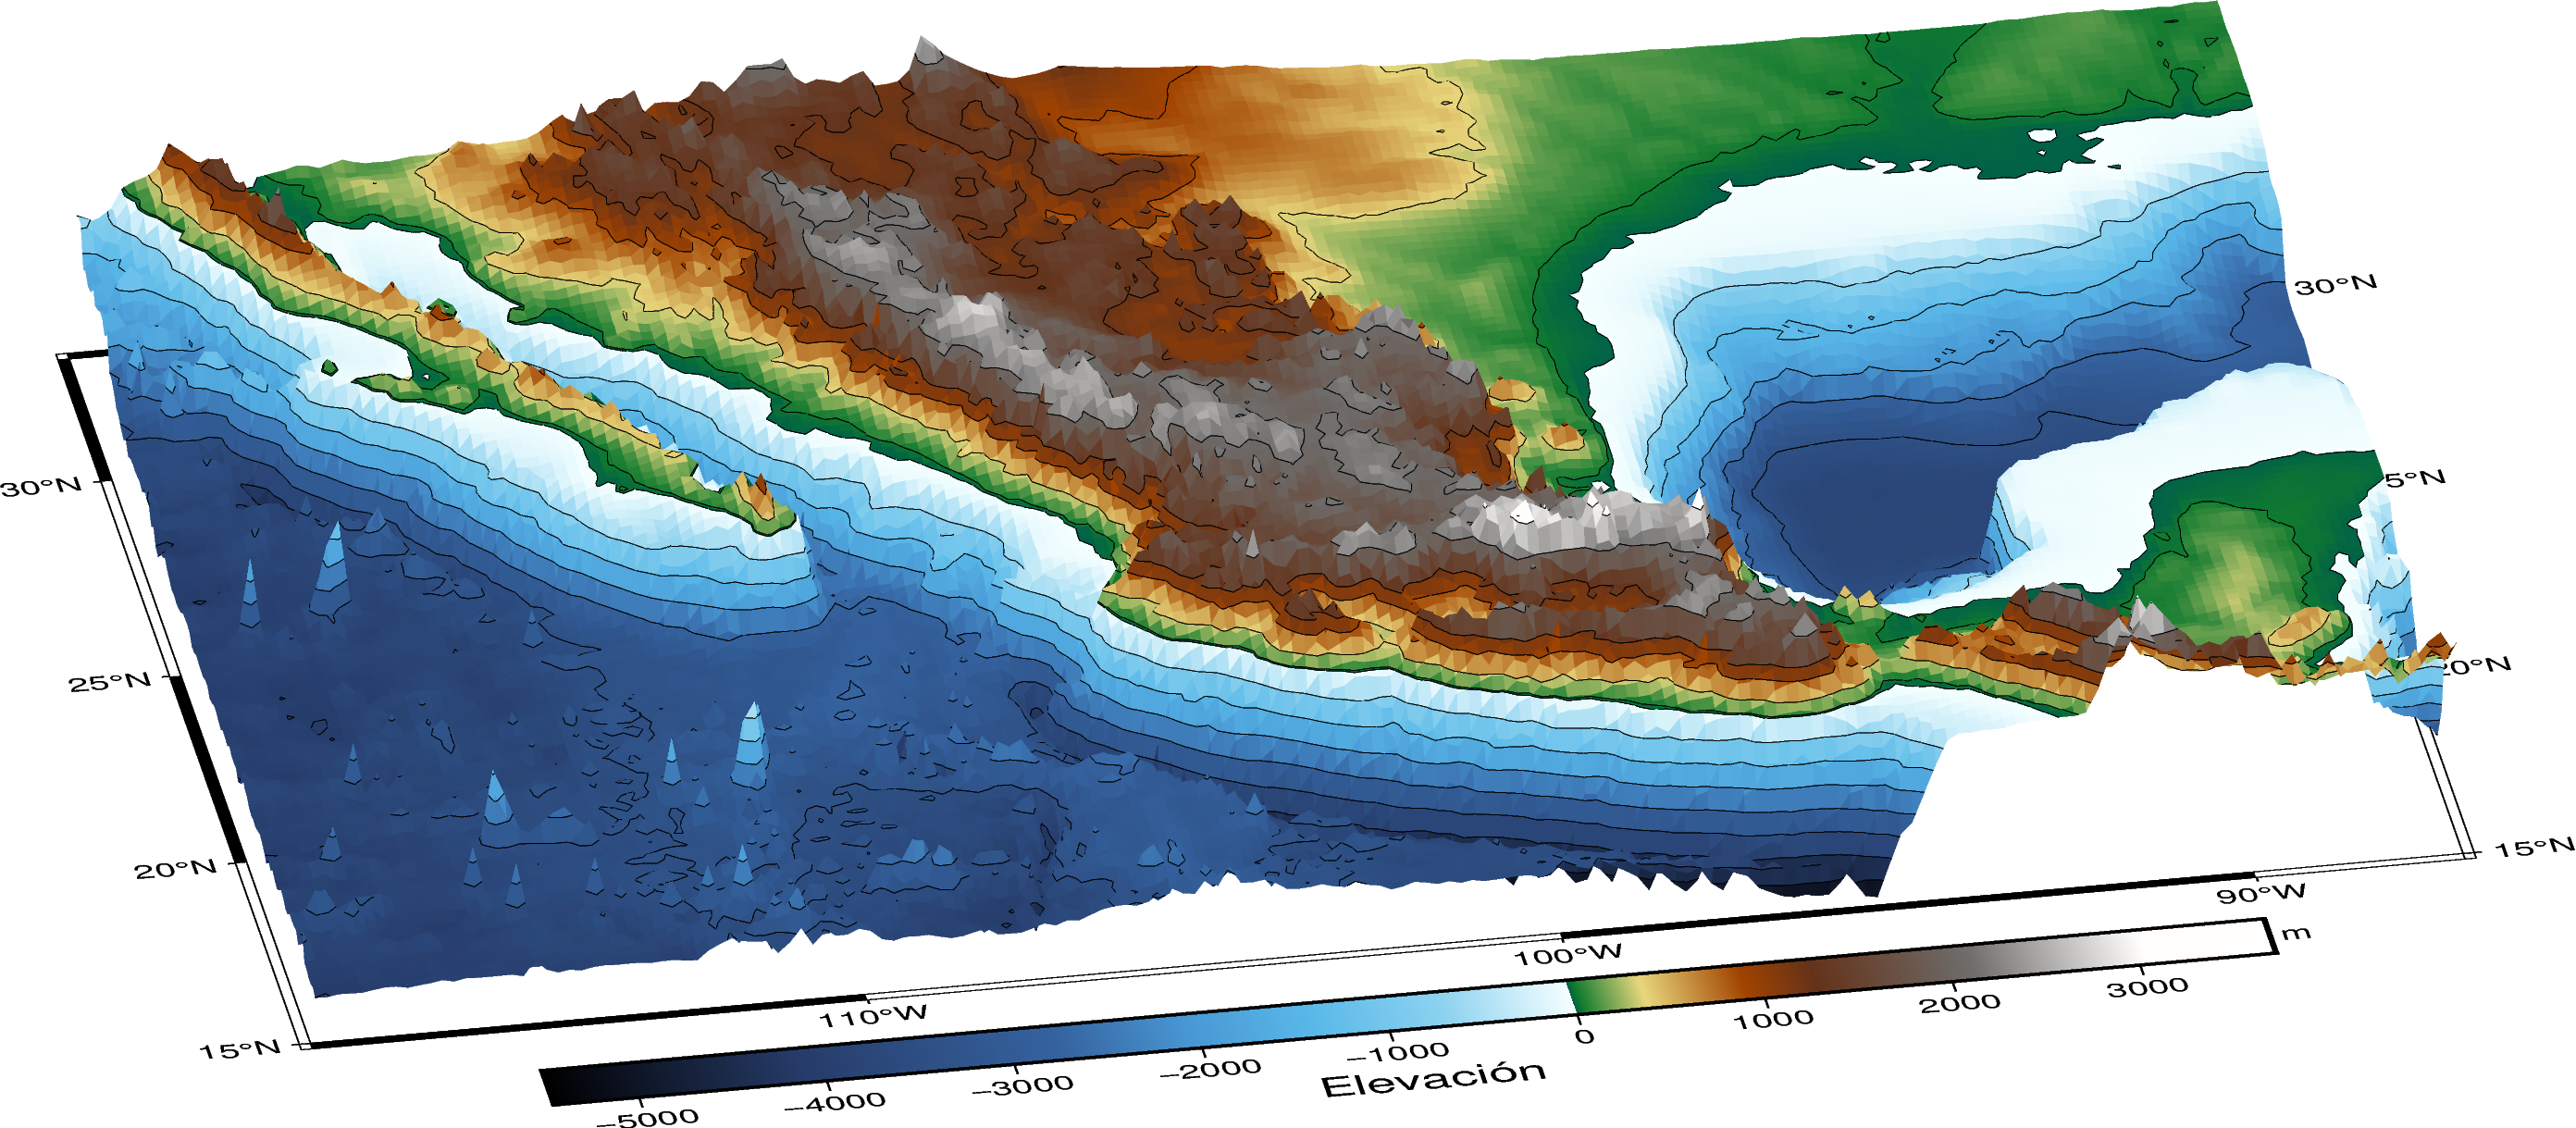

In [7]:
fig = pygmt.Figure()
fig.grdview(
    grid=grid,
    # Sets the view azimuth as 190 degrees, and the view elevation as 30 degrees
    perspective=[190, 30],
    # Sets the x- and y-axis labels, and annotates the west, south, and east axes
    frame=["xa", "ya", "WSnE"],
    # Sets a Mercator projection on a 15-centimeter figure
    projection="M20c",
    # Sets the height of the three-dimensional relief at 1.5 centimeters
    zsize="3c",
    surftype="s",
    cmap="geo",
    contourpen="0.1p",
)
fig.colorbar(perspective=True, frame=["a1000", "x+lElevación", "y+lm"])

# Save figure
out_file = "Elevacion_3D.png"
fig.savefig(out_file, dpi=300)

fig.show()

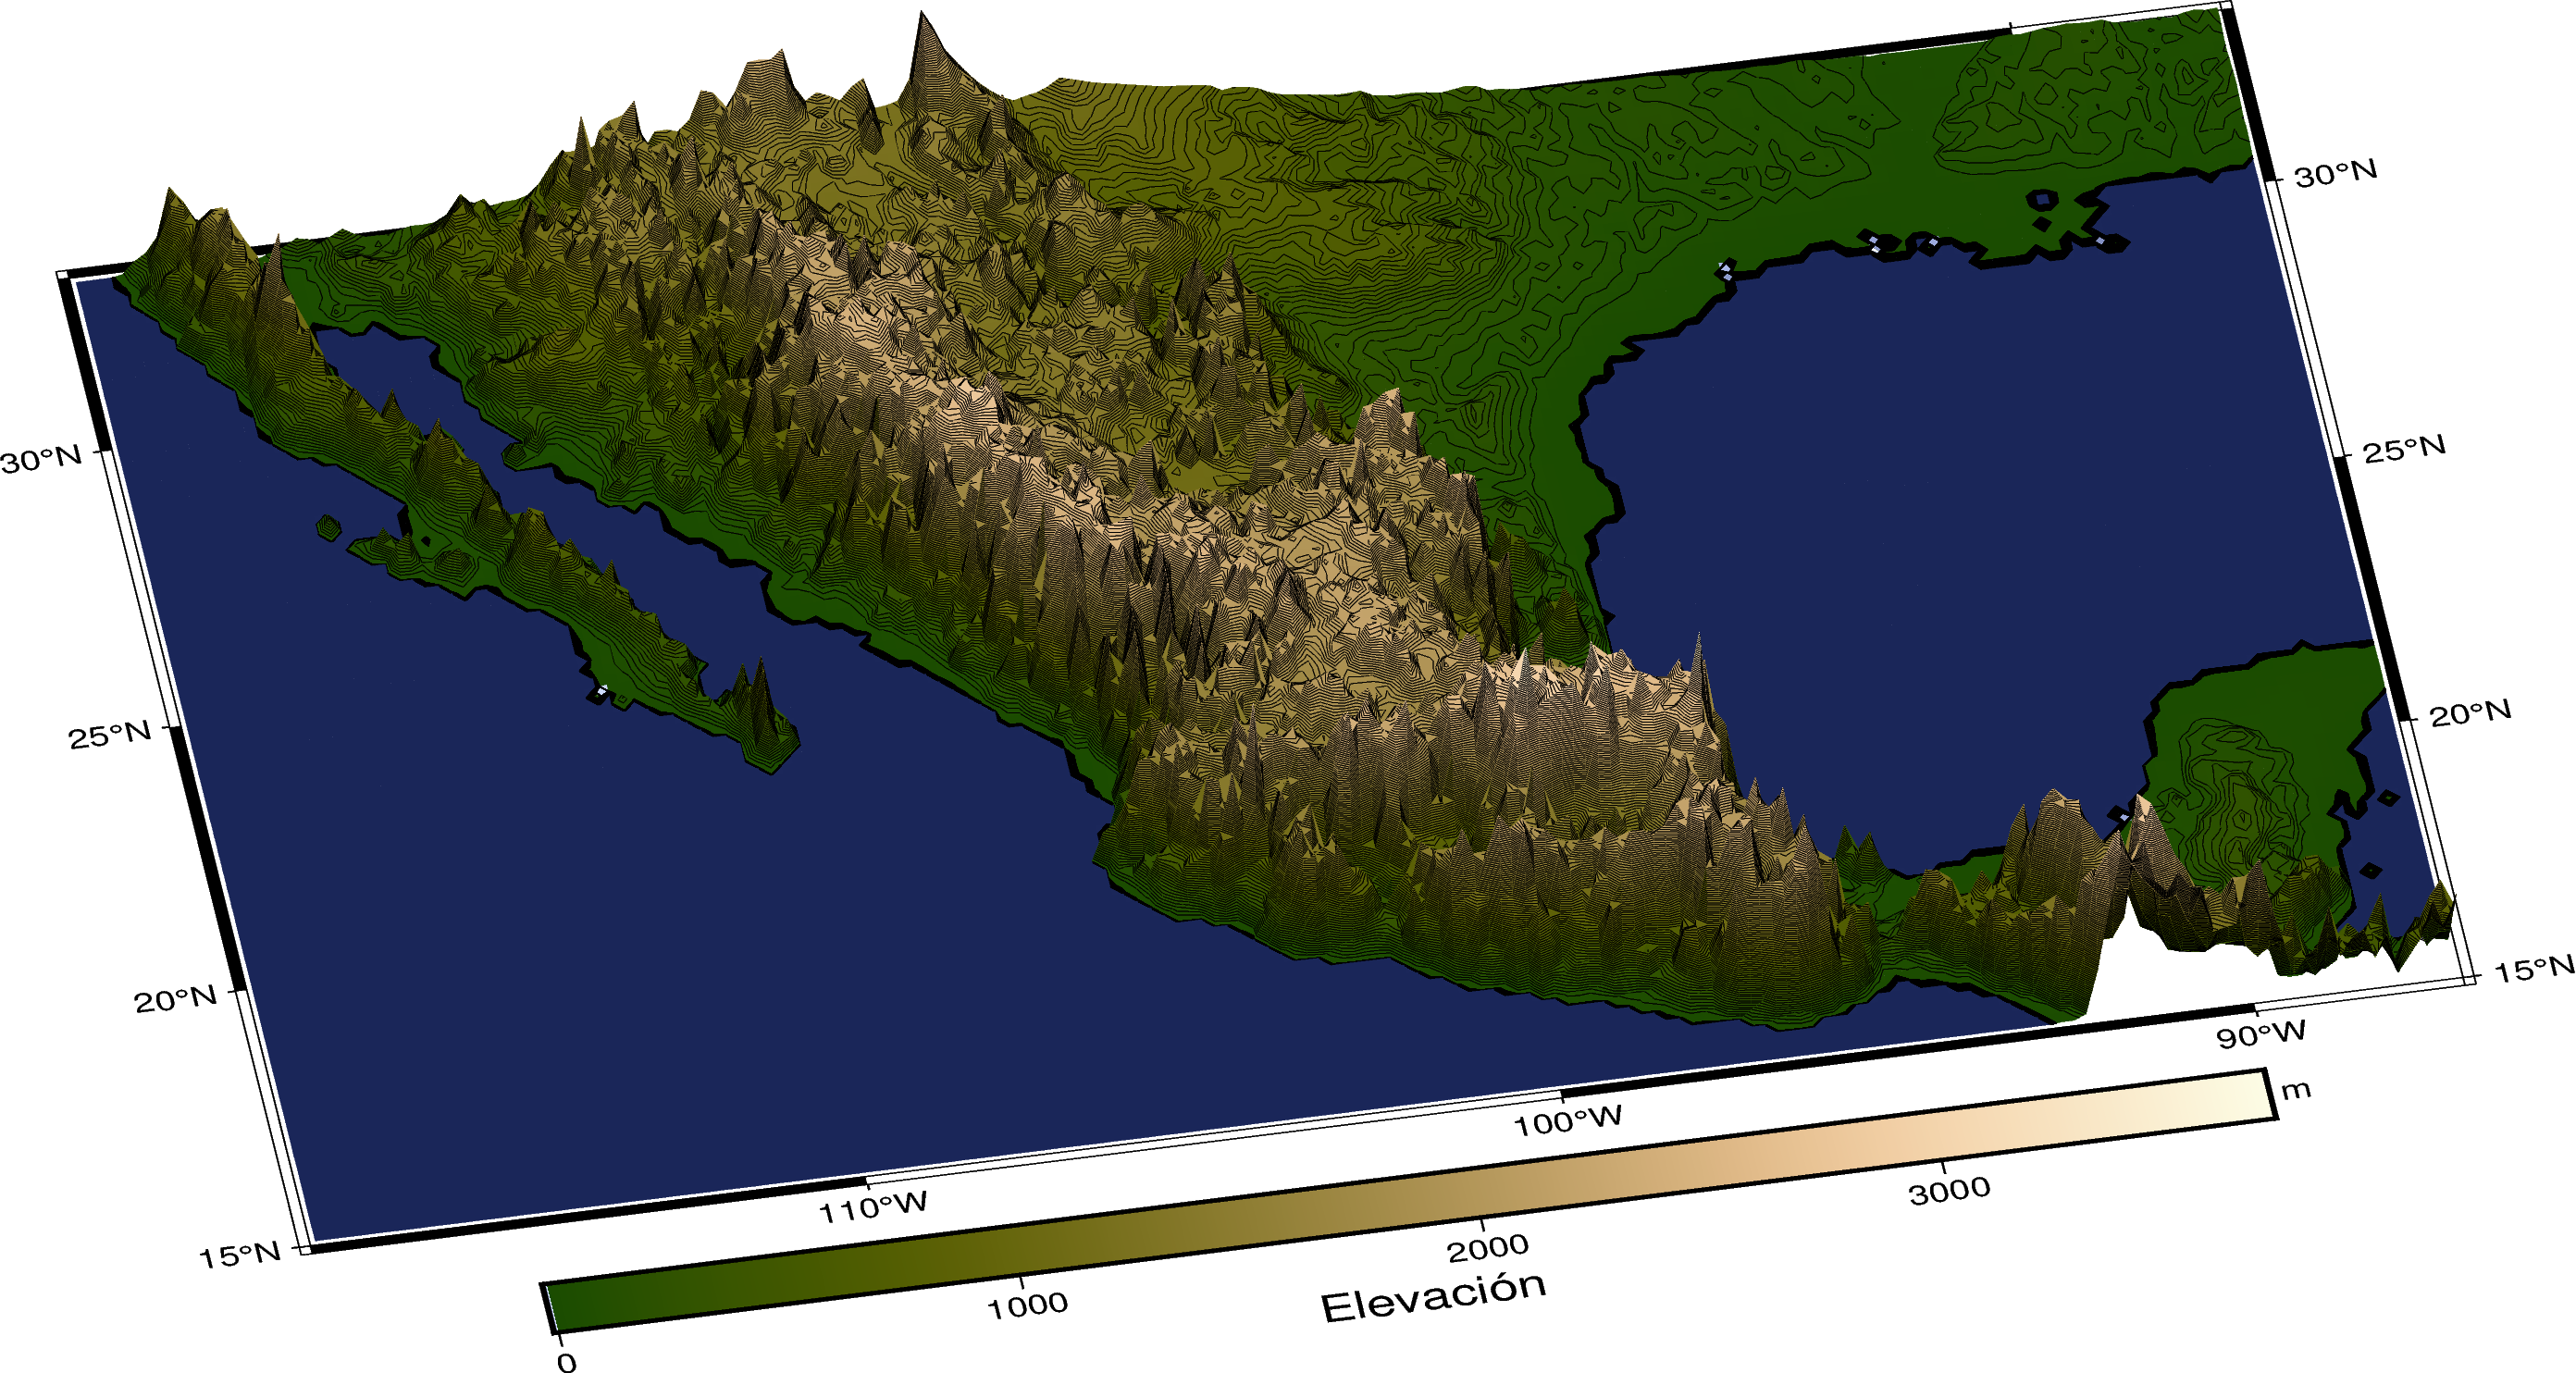

In [28]:
fig = pygmt.Figure()
fig.grdview(
    grid=gridt,
    # Sets the view azimuth as 190 degrees, and the view elevation as 30 degrees
    perspective=[190, 45],
    # Sets the x- and y-axis labels, and annotates the west, south, and east axes
    frame=["xa", "ya", "WSnE"],
    # Sets a Mercator projection on a 15-centimeter figure
    projection="M20c",
    # Sets the height of the three-dimensional relief at 1.5 centimeters
    zsize="3c",
    surftype="s",
    cmap="oleron",
    contourpen="0.1p",
)
fig.colorbar(perspective=True, frame=["a1000", "x+lElevación", "y+lm"])

# Save figure
out_file = "Terreno_3D.png"
fig.savefig(out_file, dpi=300)

fig.show()

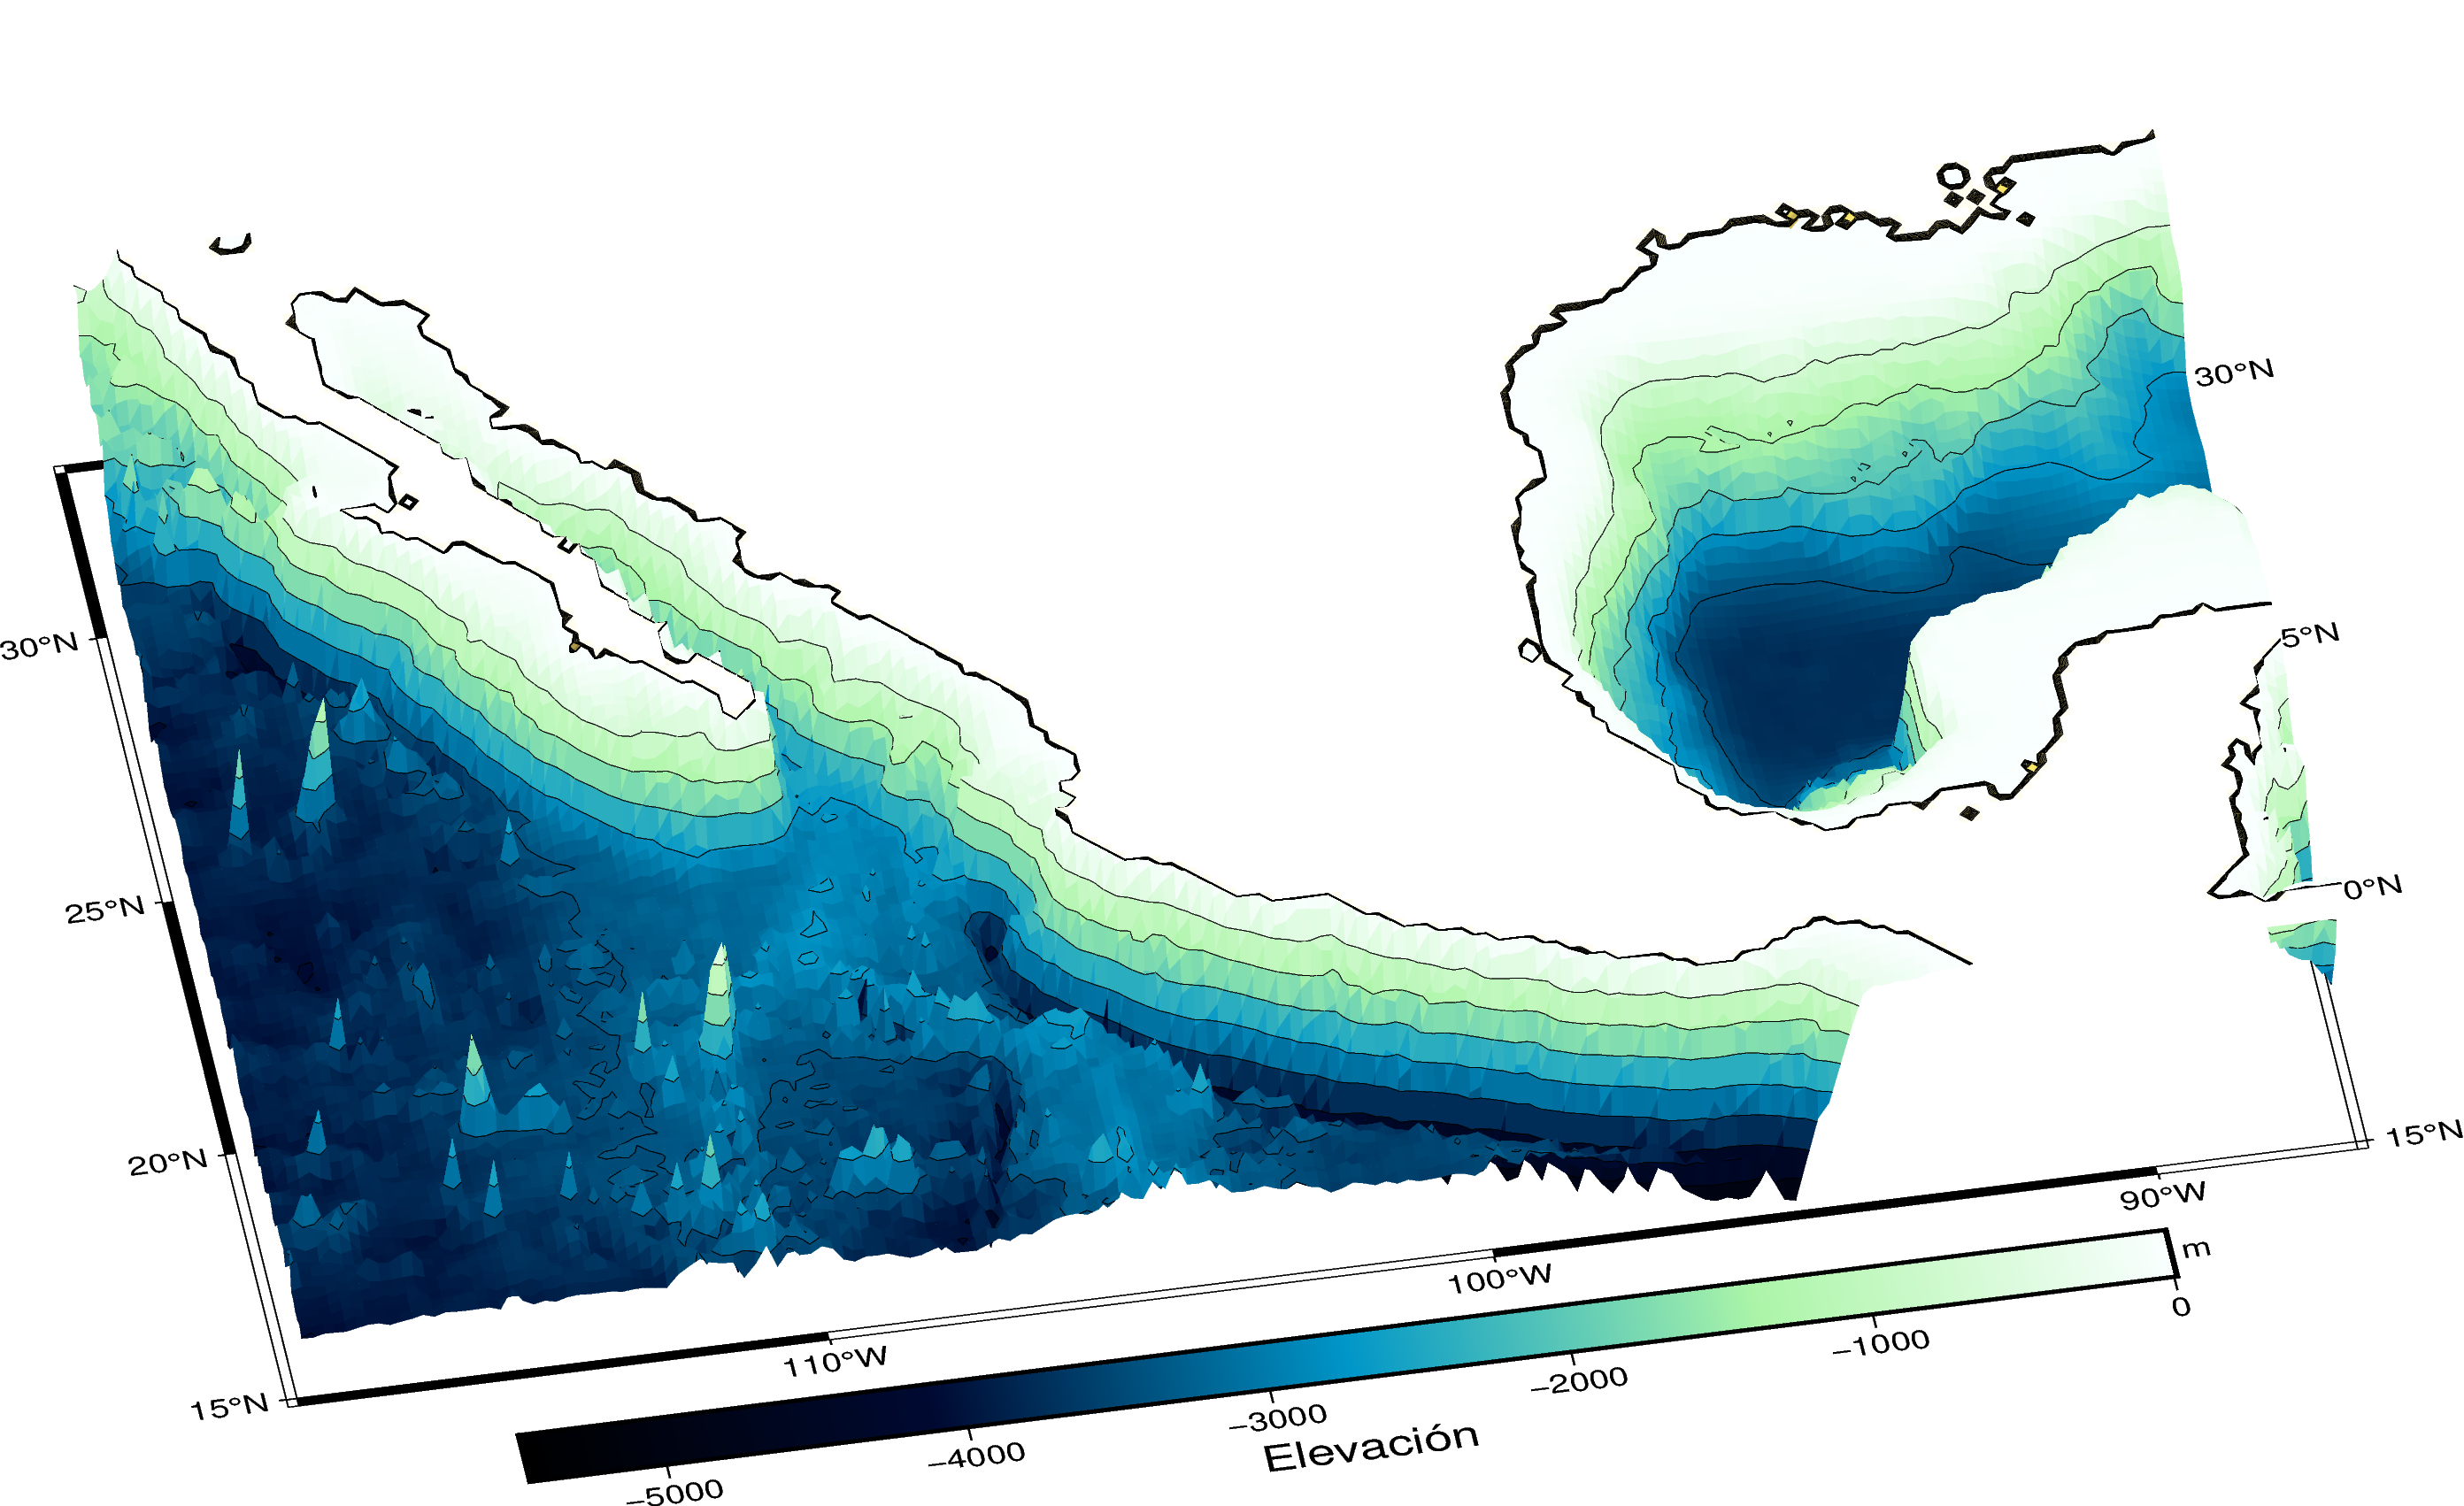

In [9]:
fig = pygmt.Figure()
fig.grdview(
    grid=gridw,
    # Sets the view azimuth as 190 degrees, and the view elevation as 30 degrees
    perspective=[190, 45],
    # Sets the x- and y-axis labels, and annotates the west, south, and east axes
    frame=["xa", "ya", "WSnE"],
    # Sets a Mercator projection on a 15-centimeter figure
    projection="M20c",
    # Sets the height of the three-dimensional relief at 1.5 centimeters
    zsize="3c",
    surftype="s",
    cmap="relief",
    contourpen="0.1p",
)
fig.colorbar(perspective=True, frame=["a1000", "x+lElevación", "y+lm"])

# Save figure
out_file = "FondoMarino_3D.png"
fig.savefig(out_file, dpi=300)

fig.show()

In [29]:
import matplotlib.image as mpimg
img1 = mpimg.imread('Elevacion_3D.png')
img2 = mpimg.imread('FondoMarino_3D.png')
img3 = mpimg.imread('Terreno_3D.png')

In [30]:
plt.figure(figsize=(20,10))

plt.subplot(221)
plt.imshow(img3)
plt.axis('off')
plt.title('Sobre Nivel del Mar')

plt.subplot(222)
plt.imshow(img2)
plt.axis('off')
plt.title('Bajo Nivel del Mar')

plt.subplot(212)
plt.imshow(img1)
plt.axis('off')
plt.title('Elevación')

plt.show()

TypeError: 'Figure' object is not callable